In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

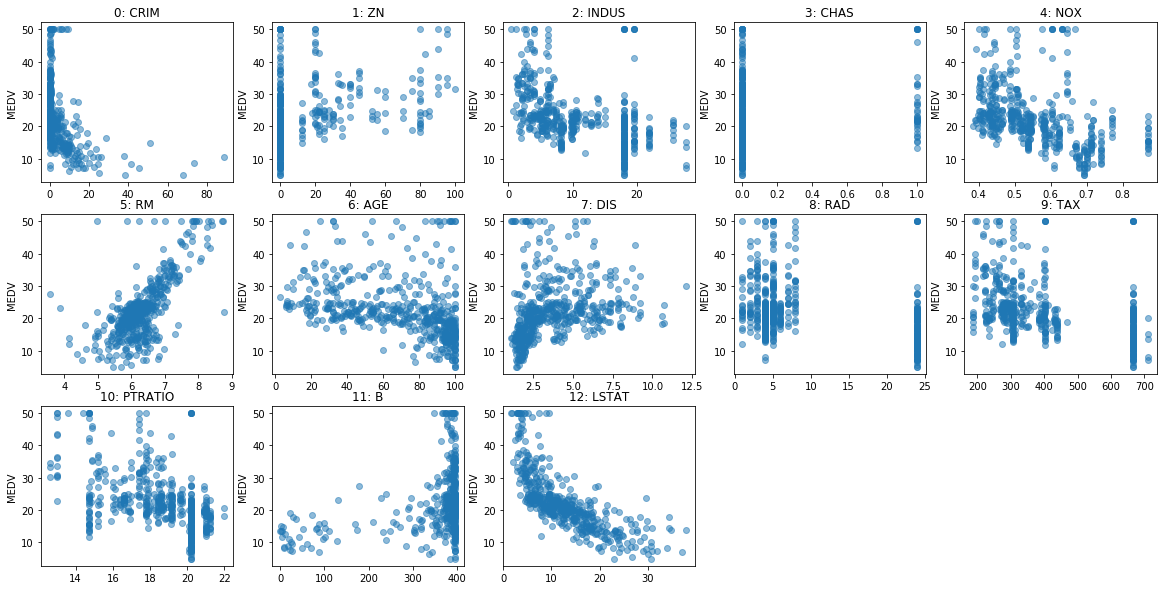

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

Text(0,0.5,'MEDV')

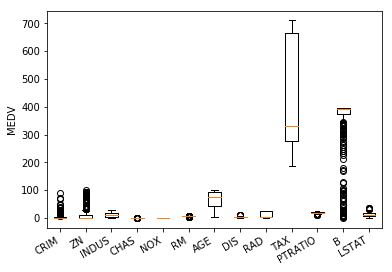

In [5]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

In [7]:
print(X)

[[12.1438515   4.78117369]
 [11.8888119   5.75339082]
 [11.34468785  4.63824349]
 [11.92229526  2.36006775]
 [10.99313649  3.93528488]
 [11.19679821  4.45456477]
 [14.563957    4.3389402 ]
 [12.5211582   6.56405517]
 [12.66300069  6.92187496]
 [13.61787476  7.53898003]
 [13.06393839  3.99078055]
 [12.61215674  9.28640289]
 [11.35656532  6.7681238 ]
 [11.37839711  9.31872494]
 [12.50048972  2.73569682]
 [12.76566918  4.27689813]
 [11.68937095  4.48709629]
 [11.35760513  3.99907772]
 [13.12719906  2.10376912]
 [12.03763281  5.14664757]
 [12.20989214  4.7467316 ]
 [13.24892115  7.31540984]
 [11.69289001  4.54322016]
 [12.96346605  7.59676542]
 [14.93027136  7.64866327]
 [12.50229021  7.48496608]
 [12.06439343  4.74115688]
 [13.8336073   7.24176117]
 [11.54824906  7.7265912 ]
 [12.75082841  6.33454307]
 [11.23501274  4.78248134]
 [13.4083858   7.81956754]
 [14.42846765  4.85948594]
 [11.18378052  4.29564214]
 [13.32452898  7.12110935]
 [13.72550582  6.64867534]
 [11.5093186   7.57718455]
 

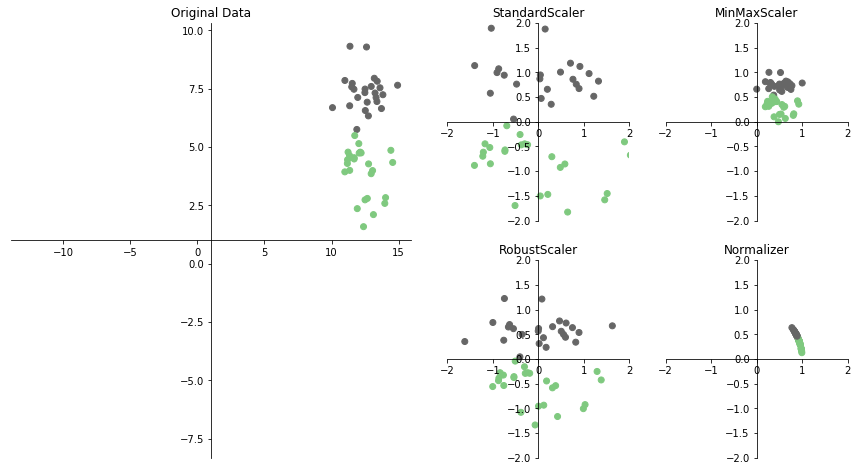

In [8]:
plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("Original Data")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(other_axes, [StandardScaler(), RobustScaler(),
                                   MinMaxScaler(), Normalizer(norm='l2')]):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7171539440210994, 0.12542507765338717)

In [11]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7178577409924868, 0.1271451891289619)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49901769734878754, 0.1459168750863542)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7502341979953768, 0.10562600471156965)

# Pipelines

In [17]:
from sklearn.linear_model import Ridge
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.632178025106451

In [18]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6345884564889054

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7455608822349746, 0.10625173604969355)

In [20]:
print(knn_pipe.steps)

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'))]


In [21]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor)))

In [22]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
0.5999825126971097


/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# FEATURE ENGINEERING

Text(0,0.5,'MEDV')

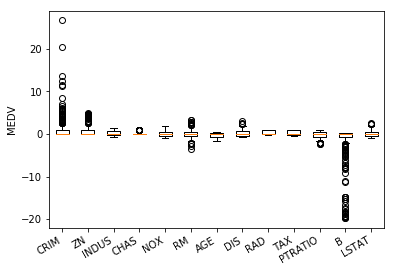

In [23]:
plt.boxplot(X_train_scaled)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

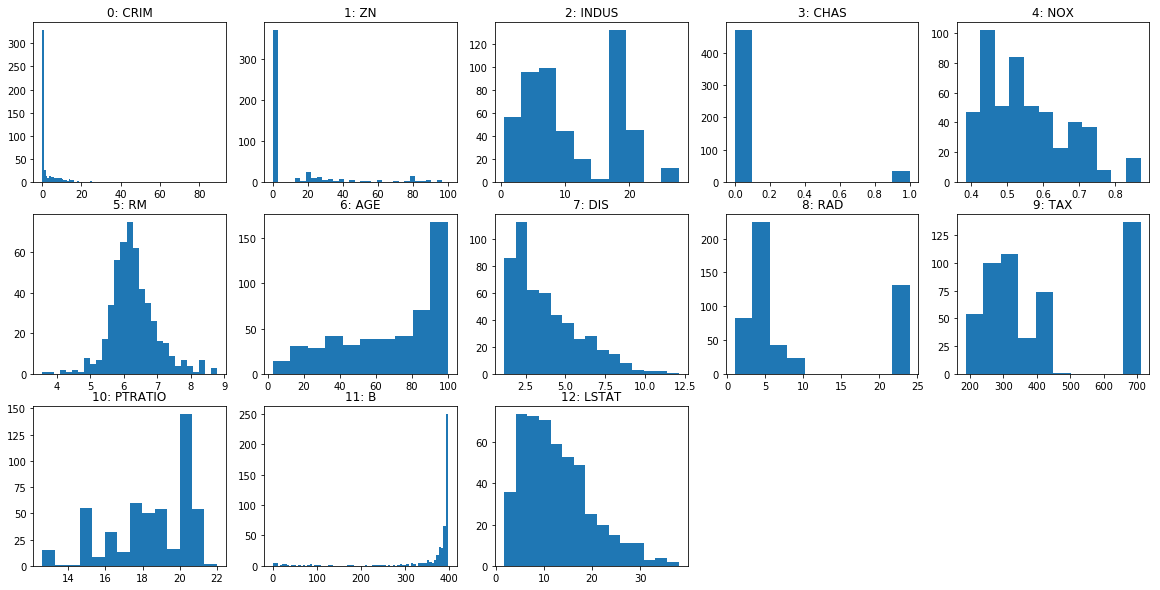

In [24]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.hist(X[:, i], bins="auto")
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))

In [26]:
def bc(x, l):
    if l == 0:
        return np.log(x)
    else:
        return (x ** l - 1) / l

In [27]:
line = np.arange(1e-10, 10, 100)

In [28]:
line

array([1.e-10])

(0, 10)

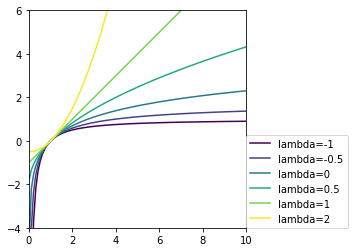

In [29]:
line = np.linspace(.01, 10, 100)
colors =  [plt.cm.viridis(i) for i in np.linspace(0, 1, 6)]
for l, c in zip([-1, -.5, 0, .5, 1, 2], colors):
    plt.plot(line, bc(line, l), label="lambda={}".format(l), color=c)
plt.ylim(-4, 6)
plt.gca().set_aspect("equal")
plt.legend(loc=(1, 0))
plt.xlim(0, 10)

In [30]:
from sklearn.preprocessing import MinMaxScaler
# this is very hacky and you probably shouldn't do this in real life.
X_train_mm = MinMaxScaler().fit_transform(X_train)

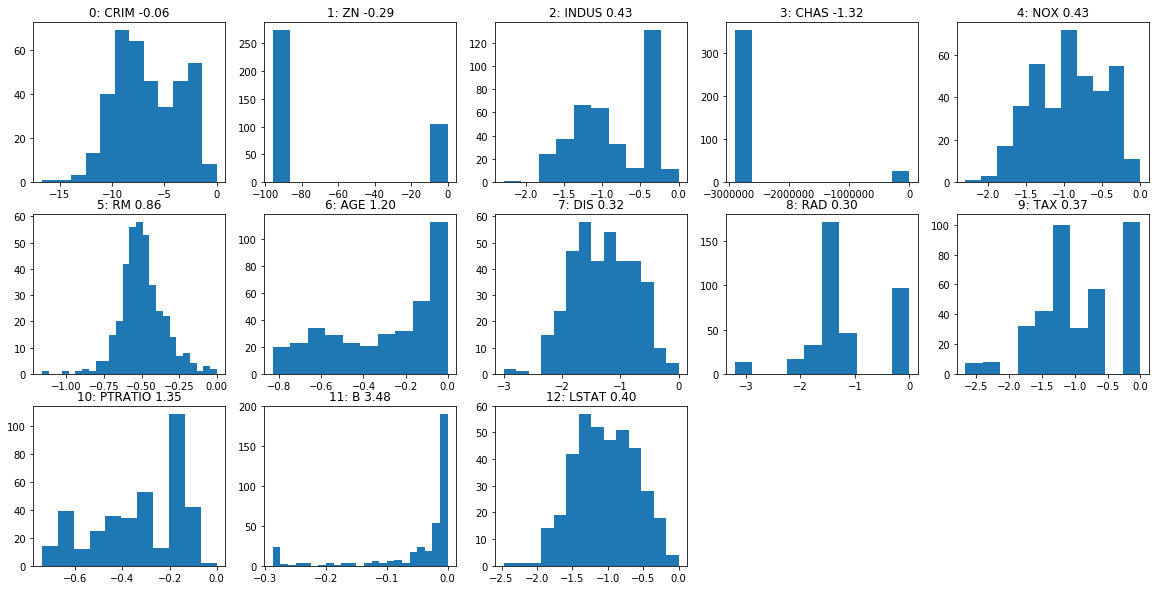

In [31]:
from scipy import stats
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
X_bc = []
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    x, lambda_x = stats.boxcox(X_train_mm[:, i] + 1e-5)
    X_bc.append(x)
    ax.hist(x, bins="auto")
    ax.set_title("{}: {} {:.2f}".format(i, boston.feature_names[i], lambda_x))

In [32]:
X_bc = np.array(X_bc).T

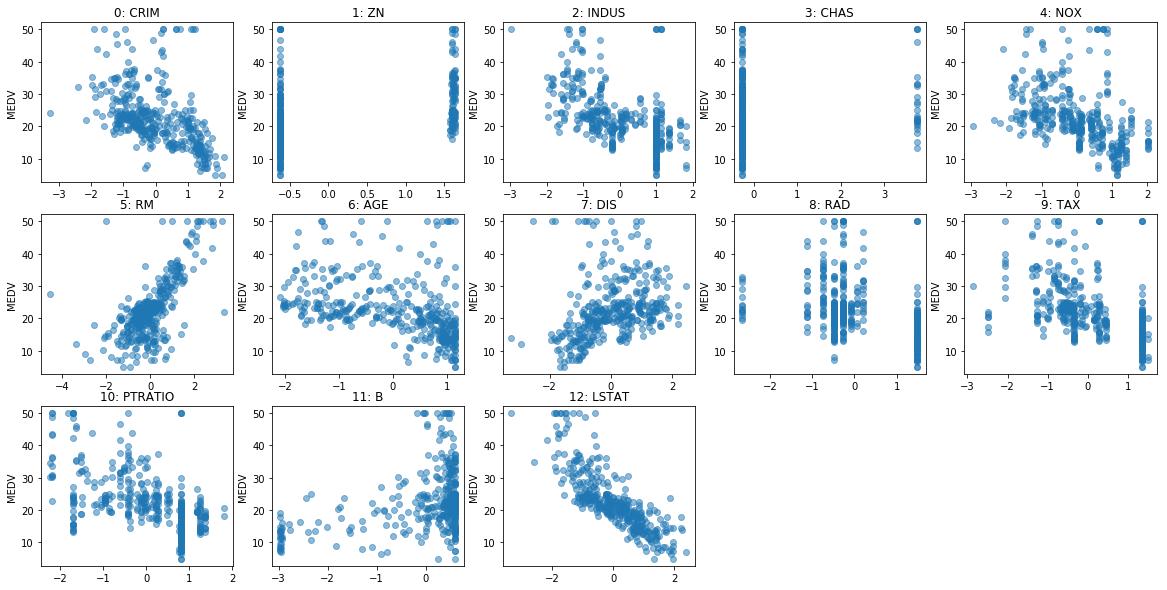

In [33]:
X_bc_scaled = StandardScaler().fit_transform(X_bc)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X_bc_scaled[:, i], y_train, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [34]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCV(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7171539440210994, 0.12542507765338717)

In [35]:
scores = cross_val_score(RidgeCV(), X_train_scaled, y_train, cv=10)
print(np.mean(scores), np.std(scores))

(0.7173892484067748, 0.1259090881308164)


In [36]:
scores = cross_val_score(RidgeCV(), X_bc_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7594316414107524, 0.08105853008341792)

In [37]:
ridge = RidgeCV().fit(X_train_scaled, y_train)
ridge_bc = RidgeCV().fit(X_bc_scaled, y_train)


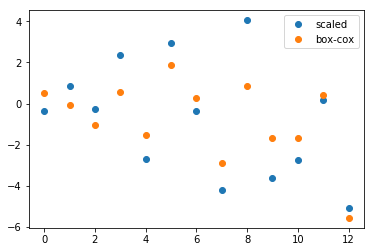

In [38]:
plt.plot(ridge.coef_, 'o', label="scaled")
plt.plot(ridge_bc.coef_, 'o', label="box-cox")
plt.legend()

In [39]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,boro,salary
0,Manhatten,103
1,Queens,89
2,Manhatten,142
3,Brooklyn,54
4,Brooklyn,63
5,Bronx,219


In [40]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [41]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1,0, 2, 2, 3]})
df

,boro,salary
0,0,103
1,1,89
2,0,142
3,2,54
4,2,63
5,3,219


In [42]:
pd.get_dummies(df, columns=['boro'])

,salary,boro_0,boro_1,boro_2,boro_3
0,103,1,0,0,0
1,89,0,1,0,0
2,142,1,0,0,0
3,54,0,0,1,0
4,63,0,0,1,0
5,219,0,0,0,1


In [43]:
df2 = pd.DataFrame({'salary': [73, 98, 204, 54],
                   'boro': ['Staten Island', 'Manhatten', 'Brooklyn', 'Bronx']})
df2


,boro,salary
0,Staten Island,73
1,Manhatten,98
2,Brooklyn,204
3,Bronx,54


In [44]:
pd.get_dummies(df2)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Staten Island
0,73,0,0,0,1
1,98,0,0,1,0
2,204,0,1,0,0
3,54,1,0,0,0


In [45]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df.boro = df.boro.astype("category", categories=['Manhatten', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'])
pd.get_dummies(df)

/home/xs2wasifali/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2878: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


,salary,boro_Manhatten,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,1,0,0,0,0
1,89,0,1,0,0,0
2,142,1,0,0,0,0
3,54,0,0,1,0,0
4,63,0,0,1,0,0
5,219,0,0,0,1,0


In [46]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': [0, 1, 0, 2, 2, 3]})
X = df.values
ohe = OneHotEncoder(categorical_features=[0]).fit(X)
ohe.transform(X).toarray()

/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[  1.,   0.,   0.,   0., 103.],
       [  0.,   1.,   0.,   0.,  89.],
       [  1.,   0.,   0.,   0., 142.],
       [  0.,   0.,   1.,   0.,  54.],
       [  0.,   0.,   1.,   0.,  63.],
       [  0.,   0.,   0.,   1., 219.]])

# FEATURE ENGINEERING

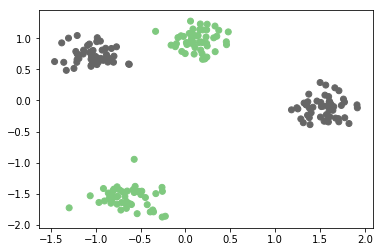

In [47]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
X, y = make_blobs(n_samples=200, centers=4, random_state=42)
X = scale(X)
y = y % 2
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')

In [48]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegressionCV().fit(X_train, y_train)
logreg.score(X_test, y_test)

/home/xs2wasifali/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5

(-2, 1.8)

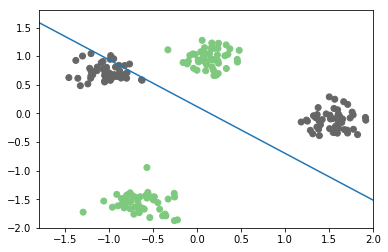

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent')
line = np.linspace(-3, 3, 100)
coef = logreg.coef_.ravel()

plt.plot(line, -(coef[0] * line + logreg.intercept_) / coef[1])

plt.xlim(-1.8, 2)
plt.ylim(-2, 1.8)